In [1]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.metrics import classification_report,confusion_matrix
import os
from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize
from pandas import DataFrame

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
from skimage.color import rgb2gray

# Data Preparation

## test dataframe

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

In [4]:
cricket_batting_test_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/cricket_batting/test/"
cricket_batting_train_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/cricket_batting/train/"

cricket_bowling_test_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/cricket_bowling/test/"
cricket_bowling_train_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/cricket_bowling/train/"

croquet_test_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/croquet/test/"
croquet_train_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/croquet/train/"

tennis_forehand_test_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/tennis_forehand/test/"
tennis_forehand_train_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/tennis_forehand/train/"

tennis_serve_test_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/tennis_serve/test/"
tennis_serve_train_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/tennis_serve/train/"

volleyball_smash_test_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/volleyball_smash/test/"
volleyball_smash_train_folder="/Users/jinny/Desktop/3/Spring/Image Processing and Pattern Recognition/Ass2/pami09_preRelease/volleyball_smash/train/"

cricket_batting_test = load_images_from_folder(cricket_batting_test_folder)
cricket_batting_train = load_images_from_folder(cricket_batting_train_folder)

cricket_bowling_test = load_images_from_folder(cricket_bowling_test_folder)
cricket_bowling_train = load_images_from_folder(cricket_bowling_train_folder)

croquet_test = load_images_from_folder(croquet_test_folder)
croquet_train = load_images_from_folder(croquet_train_folder)

tennis_forehand_test = load_images_from_folder(tennis_forehand_test_folder)
tennis_forehand_train = load_images_from_folder(tennis_forehand_train_folder)

tennis_serve_test = load_images_from_folder(tennis_serve_test_folder)
tennis_serve_train = load_images_from_folder(tennis_serve_train_folder)

volleyball_smash_test = load_images_from_folder(volleyball_smash_test_folder)
volleyball_smash_train = load_images_from_folder(volleyball_smash_train_folder)


In [5]:
test = DataFrame(cricket_batting_test,columns=['Image'])
test1 = DataFrame(cricket_bowling_test,columns=['Image'])
test2 = DataFrame(croquet_test,columns=['Image'])
test3 = DataFrame(tennis_forehand_test,columns=['Image'])
test4 = DataFrame(tennis_serve_test,columns=['Image'])
test5 = DataFrame(volleyball_smash_test,columns=['Image'])

In [6]:
test['Name'] = 'Cricket'
test1['Name'] = 'Cricket'
test2['Name'] = 'Croquet'
test3['Name'] = 'Tennis'
test4['Name'] = 'Tennis'
test5['Name'] = 'Volleyball'

In [7]:
test = pd.concat([test, test1, test2, test3, test4, test5])

In [8]:
test

,Image,Name
0,"[[[160, 150, 166], [164, 154, 170], [166, 158,...",Cricket
1,"[[[36, 40, 35], [32, 33, 29], [27, 28, 24], [2...",Cricket
2,"[[[186, 174, 164], [186, 174, 164], [186, 173,...",Cricket
3,"[[[163, 165, 153], [165, 167, 155], [161, 163,...",Cricket
4,"[[[183, 174, 170], [183, 174, 170], [185, 174,...",Cricket
...,...,...
15,"[[[2, 12, 30], [2, 12, 30], [0, 10, 28], [0, 1...",Volleyball
16,"[[[8, 17, 51], [8, 17, 51], [8, 17, 51], [8, 1...",Volleyball
17,"[[[4, 4, 4], [3, 3, 3], [2, 2, 2], [0, 0, 0], ...",Volleyball
18,"[[[24, 15, 105], [22, 13, 103], [21, 13, 100],...",Volleyball


## train dataframe

In [9]:
train = DataFrame(cricket_batting_train,columns=['Image'])
train1 = DataFrame(cricket_bowling_train,columns=['Image'])
train2 = DataFrame(croquet_train,columns=['Image'])
train3 = DataFrame(tennis_forehand_train,columns=['Image'])
train4 = DataFrame(tennis_serve_train,columns=['Image'])
train5 = DataFrame(volleyball_smash_train,columns=['Image'])

In [10]:
train['Name'] = 'Cricket'
train1['Name'] = 'Cricket'
train2['Name'] = 'Croquet'
train3['Name'] = 'Tennis'
train4['Name'] = 'Tennis'
train5['Name'] = 'Volleyball'

In [11]:
train = pd.concat([train, train1, train2, train3, train4, train5])

In [12]:
train

,Image,Name
0,"[[[10, 27, 16], [14, 31, 20], [16, 35, 26], [1...",Cricket
1,"[[[53, 37, 48], [44, 28, 39], [60, 44, 55], [5...",Cricket
2,"[[[91, 140, 126], [91, 140, 126], [91, 140, 12...",Cricket
3,"[[[57, 49, 49], [56, 48, 48], [57, 48, 44], [5...",Cricket
4,"[[[38, 89, 82], [43, 93, 89], [47, 96, 94], [4...",Cricket
...,...,...
25,"[[[54, 89, 109], [58, 93, 113], [62, 97, 117],...",Volleyball
26,"[[[0, 10, 32], [0, 3, 23], [0, 0, 13], [0, 0, ...",Volleyball
27,"[[[191, 149, 112], [194, 152, 117], [195, 152,...",Volleyball
28,"[[[228, 230, 230], [228, 230, 230], [228, 230,...",Volleyball


## Image & Label Separation

In [13]:
trainImage = []
for i in train['Image']:
    trainImage.append(i)
print(trainImage)


trainLabel = []
for i in train['Name']:
    trainLabel.append(i)
print(trainLabel)

testImage = []
for i in test['Image']:
    testImage.append(i)
print(testImage)

testLabel = []
for i in test['Name']:
    testLabel.append(i)
print(testLabel)

[array([[[ 10,  27,  16],
        [ 14,  31,  20],
        [ 16,  35,  26],
        ...,
        [195, 228, 243],
        [194, 229, 242],
        [193, 228, 241]],

       [[  8,  25,  16],
        [  9,  28,  19],
        [ 13,  32,  23],
        ...,
        [208, 235, 249],
        [208, 236, 247],
        [208, 236, 247]],

       [[  3,  21,  14],
        [  6,  24,  17],
        [ 11,  29,  22],
        ...,
        [225, 240, 249],
        [228, 239, 247],
        [228, 239, 247]],

       ...,

       [[ 45,  75,  50],
        [ 46,  76,  51],
        [ 47,  77,  52],
        ...,
        [ 52,  84,  59],
        [ 52,  84,  59],
        [ 52,  84,  59]],

       [[ 43,  73,  48],
        [ 44,  74,  49],
        [ 45,  75,  50],
        ...,
        [ 53,  85,  60],
        [ 53,  85,  60],
        [ 53,  85,  60]],

       [[ 44,  74,  49],
        [ 46,  76,  51],
        [ 47,  77,  52],
        ...,
        [ 54,  86,  61],
        [ 54,  86,  61],
        [ 54,  86,  61]

## Image Feature Extraction

In [14]:
def image_to_feature_vector(image, size=(128, 128)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(32, 32, 32)):
    # extract a 3D color histogram from the HSV color space using
    # the supplied number of `bins` per channel
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])

    # handle normalizing the histogram if we are using OpenCV 2.4.X
    if imutils.is_cv2():
        hist = cv2.normalize(hist)

    # otherwise, perform "in place" normalization in OpenCV 3
    else:
        cv2.normalize(hist, hist)

    # return the flattened histogram as the feature vector
    return hist.flatten()

In [15]:
trainRawImages= []
trainFeatures=[]

for i in trainImage:


    pixels = image_to_feature_vector(i)
    hist = extract_color_histogram(i)

    # add the messages we got to the raw images, features, and labels matricies
    trainRawImages.append(pixels)
    trainFeatures.append(hist)

In [16]:
testRawImages= []
testFeatures=[]

for i in testImage:

    pixels = image_to_feature_vector(i)
    hist = extract_color_histogram(i)

    # add the messages we got to the raw images, features, and labels matricies
    testRawImages.append(pixels)
    testFeatures.append(hist)

# KNN Classifier

## Raw Image Classification

In [17]:
errorRate = []

for kvalue in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=kvalue)
    knn.fit(trainRawImages, trainLabel)
    predictions = knn.predict(testRawImages)
    errorRate.append(np.mean(predictions != testLabel))

<IPython.core.display.Javascript object>


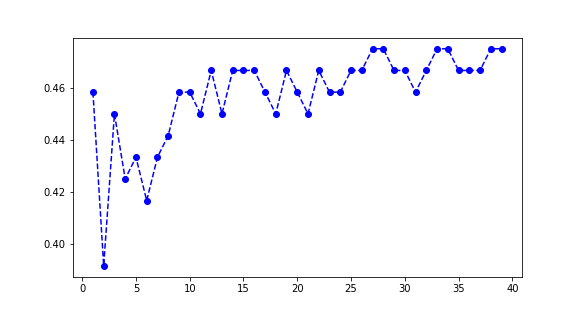

In [18]:
plt.figure(figsize=(8,4))
plt.plot(range(1,40),errorRate,color = "blue",linestyle = "dashed",marker = 'o')

## Colour Histogram classification

In [19]:
errorRate = []

for kvalue in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=kvalue)
    knn.fit(trainFeatures, trainLabel)
    predictions = knn.predict(testFeatures)
    errorRate.append(np.mean(predictions != testLabel))

<IPython.core.display.Javascript object>


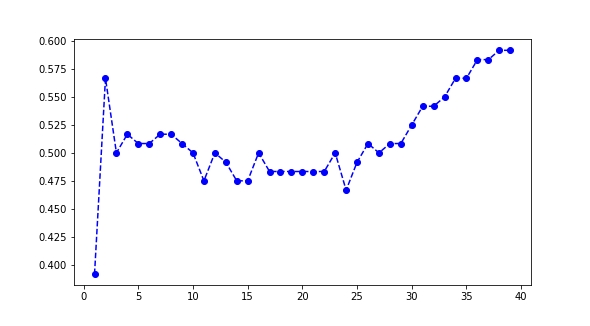

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),errorRate,color = "blue",linestyle = "dashed",marker = 'o')

## Raw Image Classification

In [21]:
print("\n")
print("[INFO] evaluating raw image accuracy...")
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(trainRawImages, trainLabel)
acc1 = model1.score(testRawImages, testLabel)

print("[INFO] k-NN classifier: k=%d" % 2)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc1 * 100))



[INFO] evaluating raw image accuracy...
[INFO] k-NN classifier: k=2
[INFO] raw pixel accuracy: 60.83%


In [22]:
predictions1 = model1.predict(testRawImages)

In [23]:
print(confusion_matrix(testLabel,predictions1))
print("___"*20)
print(classification_report(testLabel,predictions1))

[[25  4 11  0]
 [ 2 16  2  0]
 [ 2  6 32  0]
 [ 4  7  9  0]]
____________________________________________________________
              precision    recall  f1-score   support

     Cricket       0.76      0.62      0.68        40
     Croquet       0.48      0.80      0.60        20
      Tennis       0.59      0.80      0.68        40
  Volleyball       0.00      0.00      0.00        20

    accuracy                           0.61       120
   macro avg       0.46      0.56      0.49       120
weighted avg       0.53      0.61      0.56       120



C:\Users\jinny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Colour Histogram Classification

In [24]:
print("\n")
print("[INFO] evaluating histogram accuracy...")
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(trainFeatures, trainLabel)
acc2 = model2.score(testFeatures, testLabel)


print("[INFO] k-NN classifier: k=%d" % 1)
print("[INFO] histogram accuracy: {:.2f}%".format(acc2 * 100))



[INFO] evaluating histogram accuracy...
[INFO] k-NN classifier: k=1
[INFO] histogram accuracy: 60.83%


In [25]:
predictions = model2.predict(testFeatures)

In [26]:
print(confusion_matrix(testLabel,predictions1))
print("___"*20)
print(classification_report(testLabel,predictions1))

[[25  4 11  0]
 [ 2 16  2  0]
 [ 2  6 32  0]
 [ 4  7  9  0]]
____________________________________________________________
              precision    recall  f1-score   support

     Cricket       0.76      0.62      0.68        40
     Croquet       0.48      0.80      0.60        20
      Tennis       0.59      0.80      0.68        40
  Volleyball       0.00      0.00      0.00        20

    accuracy                           0.61       120
   macro avg       0.46      0.56      0.49       120
weighted avg       0.53      0.61      0.56       120



C:\Users\jinny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN Classifier

## Raw Image Classification

In [43]:
print("\n")
print("[INFO] evaluating raw pixel accuracy...")
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                      solver='sgd', tol=1e-4, random_state=1,
                      learning_rate_init=.1)
model.fit(trainRawImages, trainLabel)
acc = model.score(testRawImages, testLabel)
#print(model.predict(testRawImages))
print("[INFO] neural network raw pixel accuracy: {:.2f}%".format(acc * 100))



[INFO] evaluating raw pixel accuracy...
[INFO] neural network raw pixel accuracy: 33.33%


## Colour Histogram Classification

In [44]:
print("\n")
print("[INFO] evaluating raw pixel accuracy...")
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                      solver='sgd', tol=1e-4, random_state=1,
                      learning_rate_init=.1)
model.fit(trainFeatures, trainLabel)
acc = model.score(testFeatures, testLabel)
#print(model.predict(testFeatures))
print("[INFO] neural network colour histogram accuracy: {:.2f}%".format(acc * 100))



[INFO] evaluating raw pixel accuracy...
[INFO] neural network colour histogram accuracy: 75.83%
